对单张图像，进行英文和中文的端到端OCR，包含文字区域检测和文本内容识别。

同济子豪兄 2022-1-6

# 切换工作目录到主目录

In [1]:
import os
os.chdir('../')
os.listdir()

['.git',
 '.circleci',
 '.codespellrc',
 '.coveragerc',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmocr',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'resources',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 '__MACOSX',
 '.eggs',
 'outputs',
 'tutorials',
 '.ipynb_checkpoints',
 'dict_printed_chinese_english_digits.txt',
 'font.TTF',
 'dict_printed_chinese_english_digits.txt.1']

# 导入工具包

In [2]:
# 导入pytorch
import torch, torchvision

# 导入mmcv和mmdet
import mmcv
import mmdet

# 导入mmocr
# import mmocr

# from mmcv.ops import get_compiling_cuda_version, get_compiler_version

In [3]:
# 导入opencv-python
import cv2

# 导入可视化工具包matplotlib，并让绘制的图像嵌入在notebook中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数
def look_img_path(img_path):
    '''输入图像路径，可视化图像'''
    '''opencv读入图像，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数
def look_img(img):
    '''输入图像array，可视化图像'''
    '''输入array，matplotlib可视化格式为RGB，因此需将BGR转RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入OCR模型

In [4]:
from mmocr.utils.ocr import MMOCR

In [5]:
mmocr = MMOCR(det='TextSnake', recog='SAR',device='cpu')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_academic-dba3a4a3.pth


/home/featurize/work/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [6]:
result = mmocr.readtext('demo/demo_text_ocr.jpg', output='outputs/demo_text_ocr_pred.jpg', details=True)

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/featurize/work/mmocr/mmocr/models/textdet/postprocess/utils.py:51: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  canvas = canvas[1:h + 1, 1:w + 1].astype(np.bool)


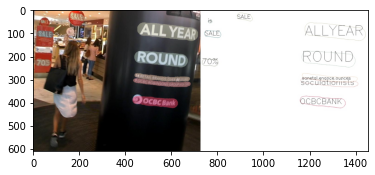

In [7]:
look_img_path('outputs/demo_text_ocr_pred.jpg')

输出的result列表中包含了所有文本区域的坐标、区域置信度、文本内容、文本内容置信度

In [8]:
# 所有文字区域的位置、置信度、内容、内容置信度
len(result[0]['result'])

9

In [9]:
# 索引为1的文字区域信息
result[0]['result'][1].keys()

dict_keys(['box', 'box_score', 'text', 'text_score'])

# 中文OCR

In [10]:
# 下载中文字库
!wget https://download.openmmlab.com/mmocr/textrecog/sar/dict_printed_chinese_english_digits.txt

# 下载中文字体
!wget https://download.openmmlab.com/mmocr/data/font.TTF

--2022-01-06 16:33:53--  https://download.openmmlab.com/mmocr/textrecog/sar/dict_printed_chinese_english_digits.txt
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 45285 (44K) [text/plain]
Saving to: ‘dict_printed_chinese_english_digits.txt.1’

dict_printed_chines 100%[===================>]  44.22K  --.-KB/s    in 0s      

2022-01-06 16:33:53 (137 MB/s) - ‘dict_printed_chinese_english_digits.txt.1’ saved [45285/45285]

--2022-01-06 16:33:53--  https://download.openmmlab.com/mmocr/data/font.TTF
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 21989620 (21M) [font/ttf]
Saving to: ‘font.TTF.1’

font.TTF.1          100%[===================>]  20.97M   111MB/s    in 0.2s    

2022-01-06 16:33:54 (111 MB/s) - ‘font.TTF.1’ saved [21989620/21989620]



# 设置中文字库路径

在`configs/textrecog/sar/sar_r31_parrallel_decoder_chinese.py`第六行中

`dict_file = 'data/chineseocr/labels/dict_printed_chinese_english_digits.txt'`

改为

`dict_file = './dict_printed_chinese_english_digits.txt'`

然后重启notebook的kernel即可

In [6]:
mmocr = MMOCR(det='TextSnake', recog='SAR_CN',device='cpu')

load checkpoint from http path: https://download.openmmlab.com/mmocr/textdet/textsnake/textsnake_r50_fpn_unet_1200e_ctw1500-27f65b64.pth
load checkpoint from http path: https://download.openmmlab.com/mmocr/textrecog/sar/sar_r31_parallel_decoder_chineseocr_20210507-b4be8214.pth


In [12]:
os.listdir('tutorials/img')

['1-out.jpg',
 'python-logo.png',
 '1-mosaic.jpg',
 '4.jpg',
 '.ipynb_checkpoints',
 '4-out.jpg',
 'python-out.jpg',
 '2.jpg',
 '3.jpg',
 '1.jpg']

/environment/miniconda3/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


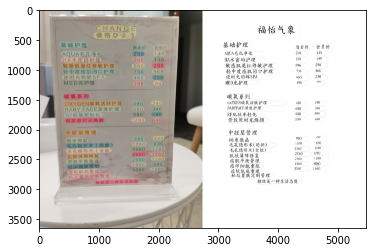

In [7]:
input_path = 'tutorials/img/1.jpg'
output_path = input_path.split('.')[-2] + '-out.jpg'
result = mmocr.readtext(input_path, output=output_path)
look_img_path(output_path)

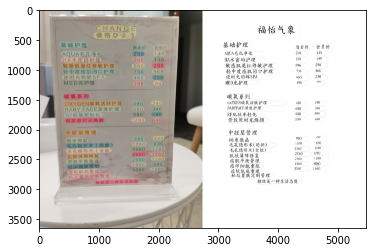

In [14]:
look_img_path(output_path)

如果报错`HTTPError: HTTP Error 502: Bad Gateway`

那就把`mmocr/core/visualize.py`第605行的

`url = ('http://download.openmmlab.com/mmocr/data/font.TTF')`

修改成

`url = ('https://download.openmmlab.com/mmocr/data/font.TTF')`

然后重启notebook的kernel即可